In [426]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zip_path= 'C:/bitirme/archive.zip'
extract_path='C:/bitirme/veri'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
extracted_files = os.listdir(extract_path)
extracted_files


['veri.xlsx']

In [427]:
# Excel dosyasını dinamik olarak bul (ilk .xlsx uzantılı dosya)
excel_file = next((file for file in extracted_files if file.endswith('.xlsx')), None)

if excel_file is None:
    raise FileNotFoundError("Excel (.xlsx) dosyası bulunamadı!")

# Tam yolunu oluştur
excel_path = os.path.join(extract_path, excel_file)

# Excel dosyasını oku
data = pd.read_excel(excel_path)

# İlk 5 satırı göster
print(data.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
import joblib
import math


In [429]:
df=data.copy()
print(df.shape)
print(df.columns)
print(df.head())
print(df.dtypes)
df.isnull().sum()

(7043, 33)
Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  L

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [430]:
df=df.drop_duplicates()
df.nunique()


CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [431]:
columns=['Count','Country','State','Lat Long']
df=df.drop(columns=columns)
df.head()

,CustomerID,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


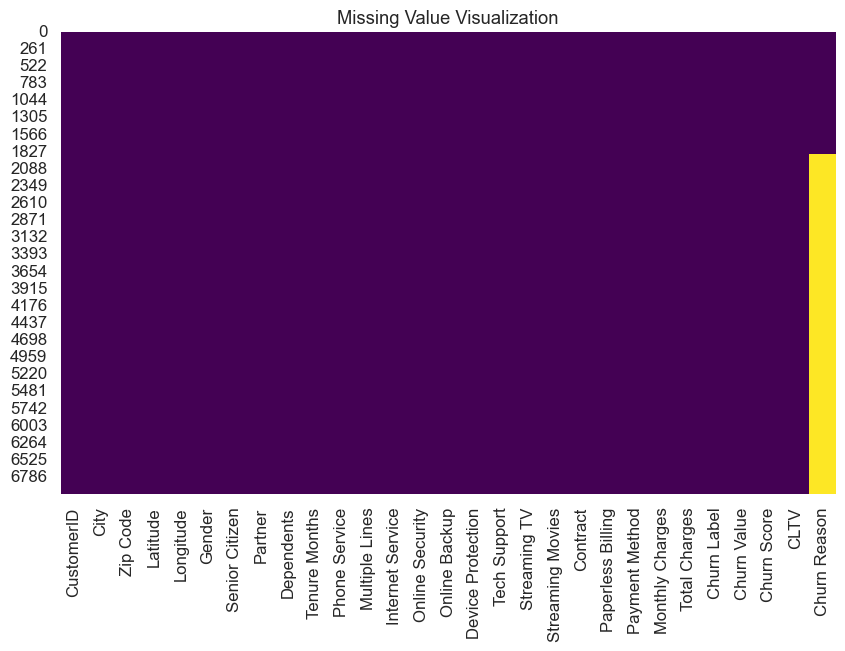

In [432]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Visualization')
plt.show()

In [433]:
# Convert 'Total Charges' to numeric, errors='coerce' will turn non-numeric values into NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.isnull().sum()

CustomerID              0
City                    0
Zip Code                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [434]:
# Handle missing values in Total Charges (NaNs)
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

df.isnull().sum()

CustomerID              0
City                    0
Zip Code                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

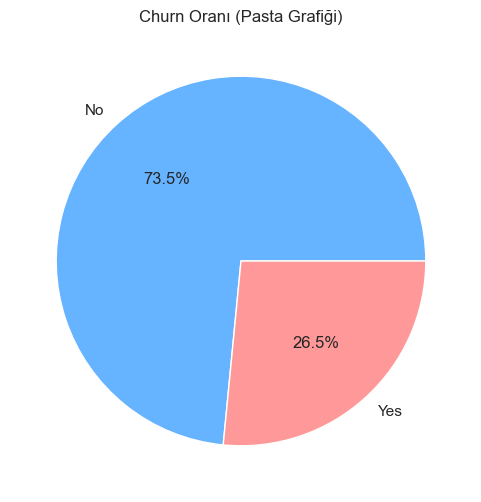

In [435]:
sns.set(style="whitegrid")  # genel stil

# 🎯 1. Churn oranı – Pasta Grafiği
churn_counts = df["Churn Label"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999"])
plt.title("Churn Oranı (Pasta Grafiği)")
plt.show()

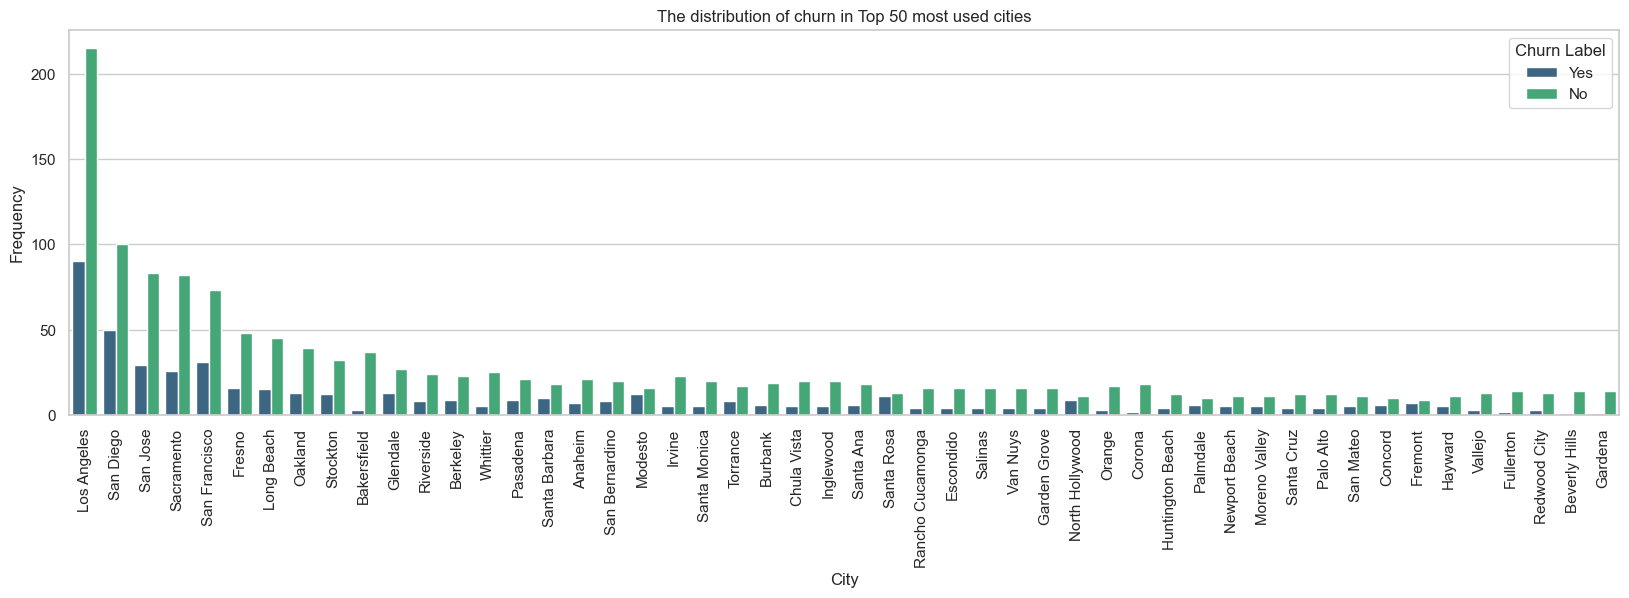

In [436]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='City', hue='Churn Label', palette='viridis',order=df['City'].value_counts().index[:50])
plt.title('The distribution of churn in Top 50 most used cities')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

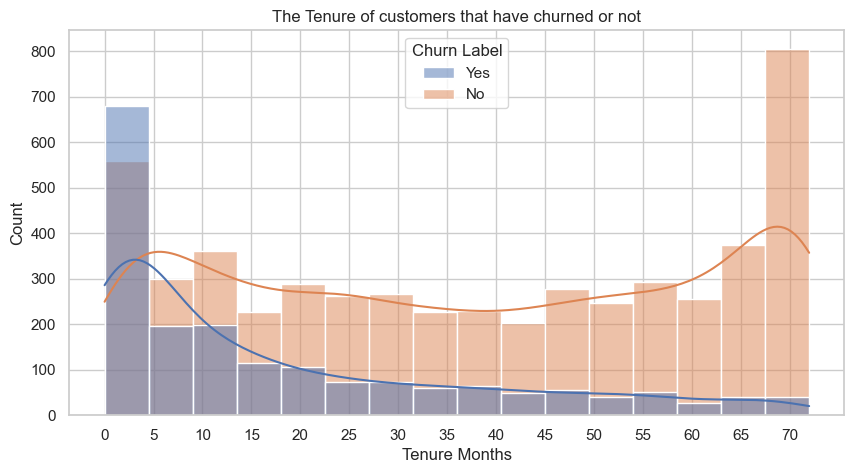

In [437]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Tenure Months'],hue=df['Churn Label'], kde=True)
plt.title('The Tenure of customers that have churned or not')
plt.xticks(np.arange(0, df['Tenure Months'].max() + 1, step=5))  # Adjust step size as needed
plt.show()

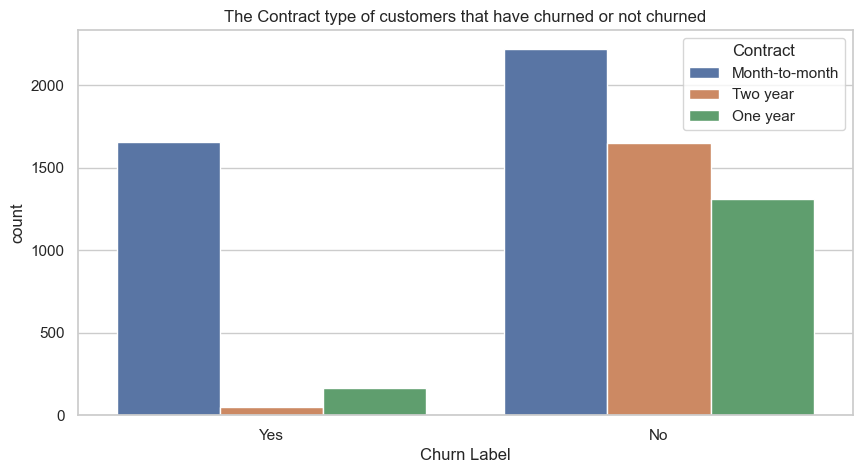

In [438]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['Contract'],x=df['Churn Label'])
plt.title('The Contract type of customers that have churned or not churned')
plt.show()

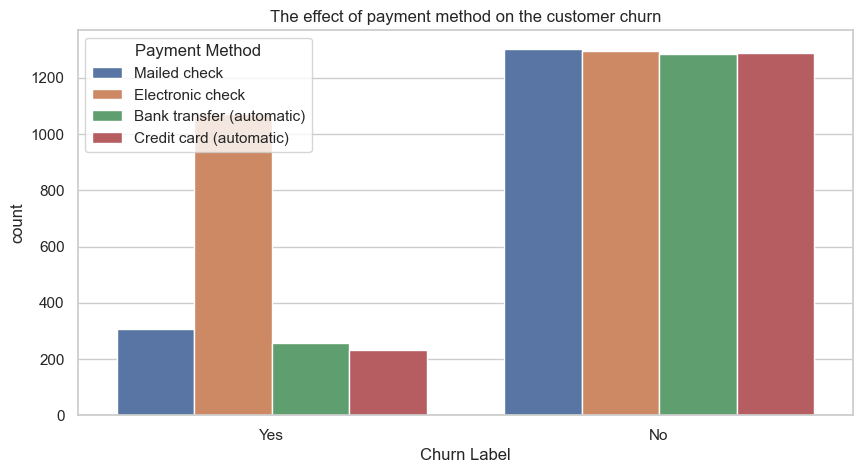

In [439]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Churn Label'],hue=df['Payment Method'])
plt.title('The effect of payment method on the customer churn')
plt.show()

C:\Users\emrea\AppData\Local\Temp\ipykernel_2812\2472125795.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, hue="Churn Value", palette=custom_palette, ax=axes[i])
C:\Users\emrea\AppData\Local\Temp\ipykernel_2812\2472125795.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, hue="Churn Value", palette=custom_palette, ax=axes[i])
C:\Users\emrea\AppData\Local\Temp\ipykernel_2812\2472125795.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, hue="Churn Value", palette=custom_palette, ax=axes[i])
C:\Users\emrea\AppData\Local\Temp\ipykernel_2812\2472125795.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=data, x=col, hue="Churn Value", palette=custom_palette, ax=axes[i])


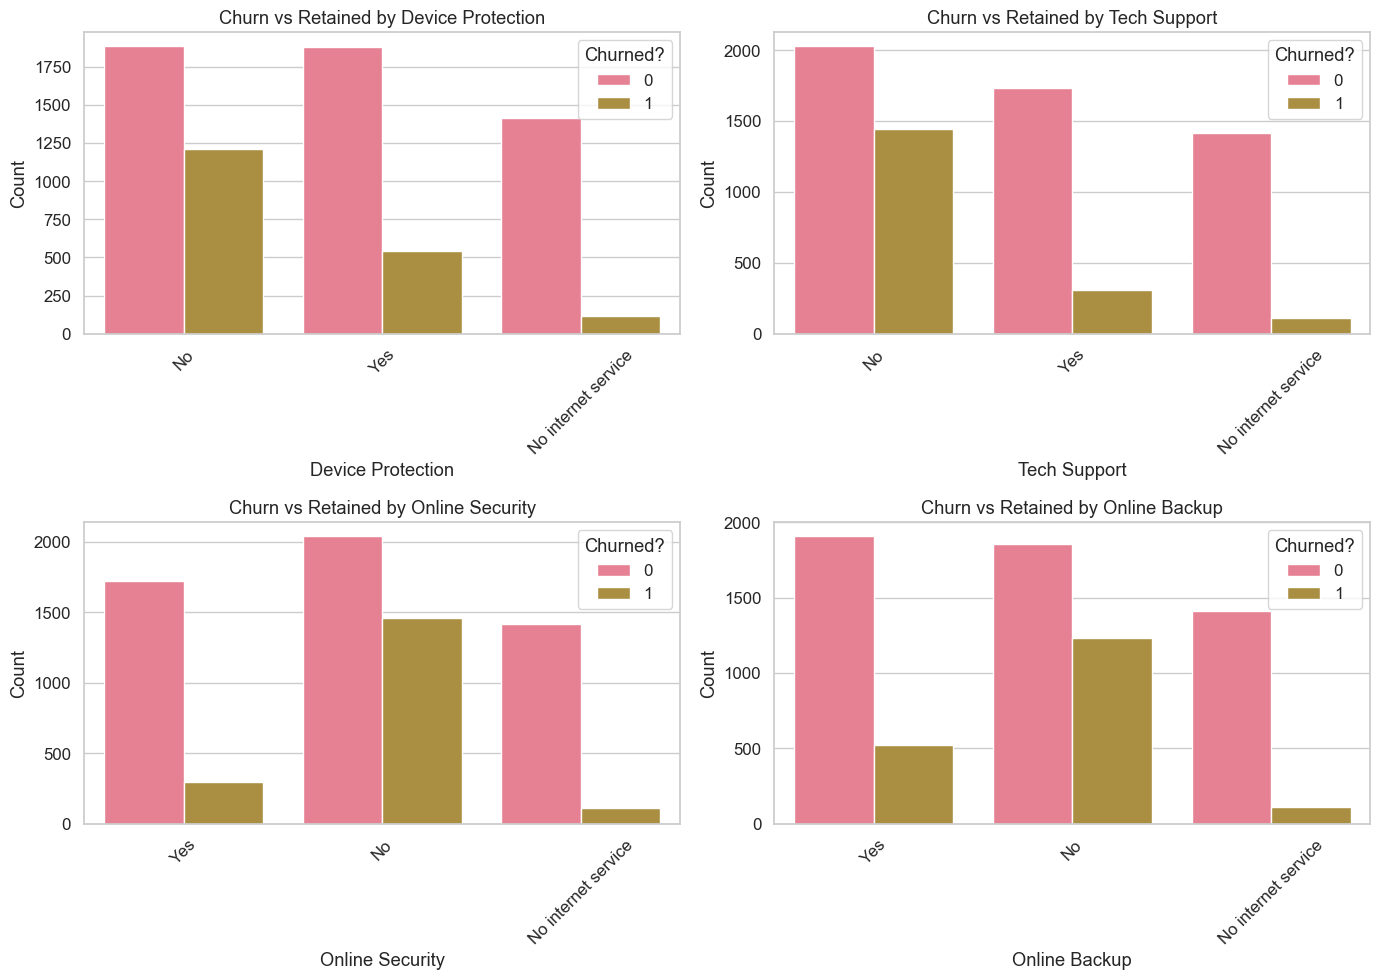

In [440]:
sns.set_theme(style="whitegrid", font_scale=1.1)
custom_palette = sns.color_palette("husl")  # You can also try "husl", "coolwarm", "Set2", or "pastel"

# Your categorical columns
# categorical_cols = ["plan_type", "region", "signup_channel"]
# graph_cat_cols = categorical_cols.drop(['City', 'Payment Method']).copy()
graph_cat_cols = ["Device Protection", "Tech Support", "Online Security", "Online Backup"]
n_cols = 2
n_rows = math.ceil(len(graph_cat_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # To index easily

for i, col in enumerate(graph_cat_cols):
    sns.countplot(data=data, x=col, hue="Churn Value", palette=custom_palette, ax=axes[i])
    axes[i].set_title(f"Churn vs Retained by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Churned?")

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

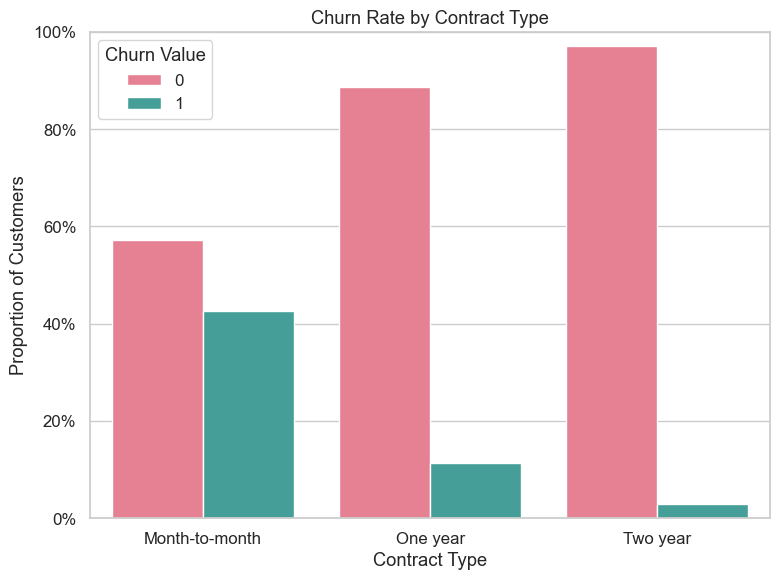

In [441]:
plot_data = data[["Contract", "Churn Value"]].dropna()

# Get count of customers grouped by Contract and Churn Value
grouped = plot_data.groupby(["Contract", "Churn Value"]).size().reset_index(name="Count")

# Convert counts to percentages within each Contract group
total_per_contract = grouped.groupby("Contract")["Count"].transform("sum")
grouped["Percent"] = grouped["Count"] / total_per_contract

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x="Contract", y="Percent", hue="Churn Value", palette="husl")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion of Customers")
plt.xlabel("Contract Type")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))  # format y-axis as %
plt.tight_layout()
plt.show()

In [442]:
mldata= df.drop(['Zip Code','Churn Reason','Churn Score', 'City','Churn Value','CustomerID','Latitude','Longitude'], axis = 1)
mldata_log= df.drop(['Zip Code','Churn Reason','Churn Score', 'City','Churn Value','Churn Label','CustomerID','Latitude','Longitude'], axis = 1)


# Temel feature'ları belirle
RMV = ["Churn", "Churn Value", "Churn Score", "Churn Reason", "Churn Label"]
FEATURES = [c for c in mldata_log.columns if c not in RMV]

joblib.dump(FEATURES, "log_features.pkl")

# Kategorik değişkenleri bul
CATS = []
for c in FEATURES:
    if mldata_log[c].dtype == "object":
        CATS.append(c)
        mldata_log[c] = mldata_log[c].fillna("NAN")


In [443]:
# İkili kategorik etkileşimler
combo_mldata = {}
new_features = []

for i in range(len(CATS)):
    for j in range(i + 1, len(CATS)):
        col1, col2 = CATS[i], CATS[j]
        new_col = f"{col1}_{col2}"
        combo_mldata[new_col] = mldata_log[col1].astype(str) + "_" + mldata_log[col2].astype(str)
        new_features.append(new_col)

# Tüm yeni özellikleri birleştir
mldata_log = pd.concat([mldata_log, pd.DataFrame(combo_mldata, index=mldata_log.index)], axis=1)



In [444]:
# Güncel feature listeleri
ENGINEERED_CATS = CATS + new_features
ENGINEERED_FEATURES = FEATURES + new_features


factorize_mappings = {}

# Encoding ve bellek optimizasyonu
for c in ENGINEERED_FEATURES:
    if c in ENGINEERED_CATS:
        codes, uniques = pd.factorize(mldata_log[c])
        mapping = dict(zip(uniques, codes))
        factorize_mappings[c] = mapping
        mldata_log[c] = pd.Series(codes, index=mldata_log.index).astype("int32").astype("category")
    else:
        if mldata_log[c].dtype == "float64":
            mldata_log[c] = mldata_log[c].astype("float32")
        if mldata_log[c].dtype == "int64":
            mldata_log[c] = mldata_log[c].astype("int32")

joblib.dump(list(mldata_log.columns), "log_expected_features.pkl")
joblib.dump(factorize_mappings, "log_factorize_map.pkl")

mldata_log['Churn Label'] = df['Churn Label']
mldata_log['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
mldata_log['Churn Label'].replace(to_replace='No',  value=0, inplace=True)
mldata_log['Churn Label']=mldata_log['Churn Label'].astype('int32')

print(mldata_log.dtypes.value_counts())
mldata_log.head()


category    46
category    27
category    17
category    12
category    10
category     9
category     8
category     6
int32        3
float32      2
category     1
Name: count, dtype: int64


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV_Contract,Streaming TV_Paperless Billing,Streaming TV_Payment Method,Streaming Movies_Contract,Streaming Movies_Paperless Billing,Streaming Movies_Payment Method,Contract_Paperless Billing,Contract_Payment Method,Paperless Billing_Payment Method,Churn Label
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,2,0,0,1,1,1,...,0,0,1,0,0,1,0,1,1,1
2,1,0,0,1,8,0,1,1,1,1,...,1,1,2,1,1,2,0,1,1,1
3,1,0,1,1,28,0,1,1,1,1,...,1,1,2,1,1,2,0,1,1,1
4,0,0,0,1,49,0,1,1,1,0,...,1,1,3,1,1,3,0,2,2,1


In [ ]:

# Sıfıra bölme hatasını önlemek için +1
mldata["AvgChargePerMonth"] = mldata["Total Charges"] / (mldata["Tenure Months"] + 1)

# Yüksek fiyatla yeni başlayan kullanıcıları yakalamak için
mldata["HighRiskNew"] = ((mldata["Monthly Charges"] > 80) & (mldata["Tenure Months"] < 6)).astype(int)

print(mldata.dtypes.value_counts())


mldata['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
mldata['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

label_encoders = {}
for col in mldata.select_dtypes(include='object').columns:
    le = LabelEncoder()
    mldata[col] = le.fit_transform(mldata[col])
    label_encoders[col] = le

# Label encoder'ları kaydet
joblib.dump(label_encoders, "label_encoders.pkl")

print(mldata.dtypes.value_counts())
mldata.head()




object     17
float64     3
int64       2
int32       1
Name: count, dtype: int64
int32      17
int64       3
float64     3
Name: count, dtype: int64


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,AvgChargePerMonth,HighRiskNew
0,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,3239,36.050000,0
1,0,0,0,1,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,2701,50.550000,0
2,0,0,0,1,8,1,2,1,0,0,...,2,0,1,2,99.65,820.50,1,5372,91.166667,0
3,0,0,1,1,28,1,2,1,0,0,...,2,0,1,2,104.80,3046.05,1,5003,105.036207,0
4,1,0,0,1,49,1,2,1,0,2,...,2,0,1,0,103.70,5036.30,1,5340,100.726000,0


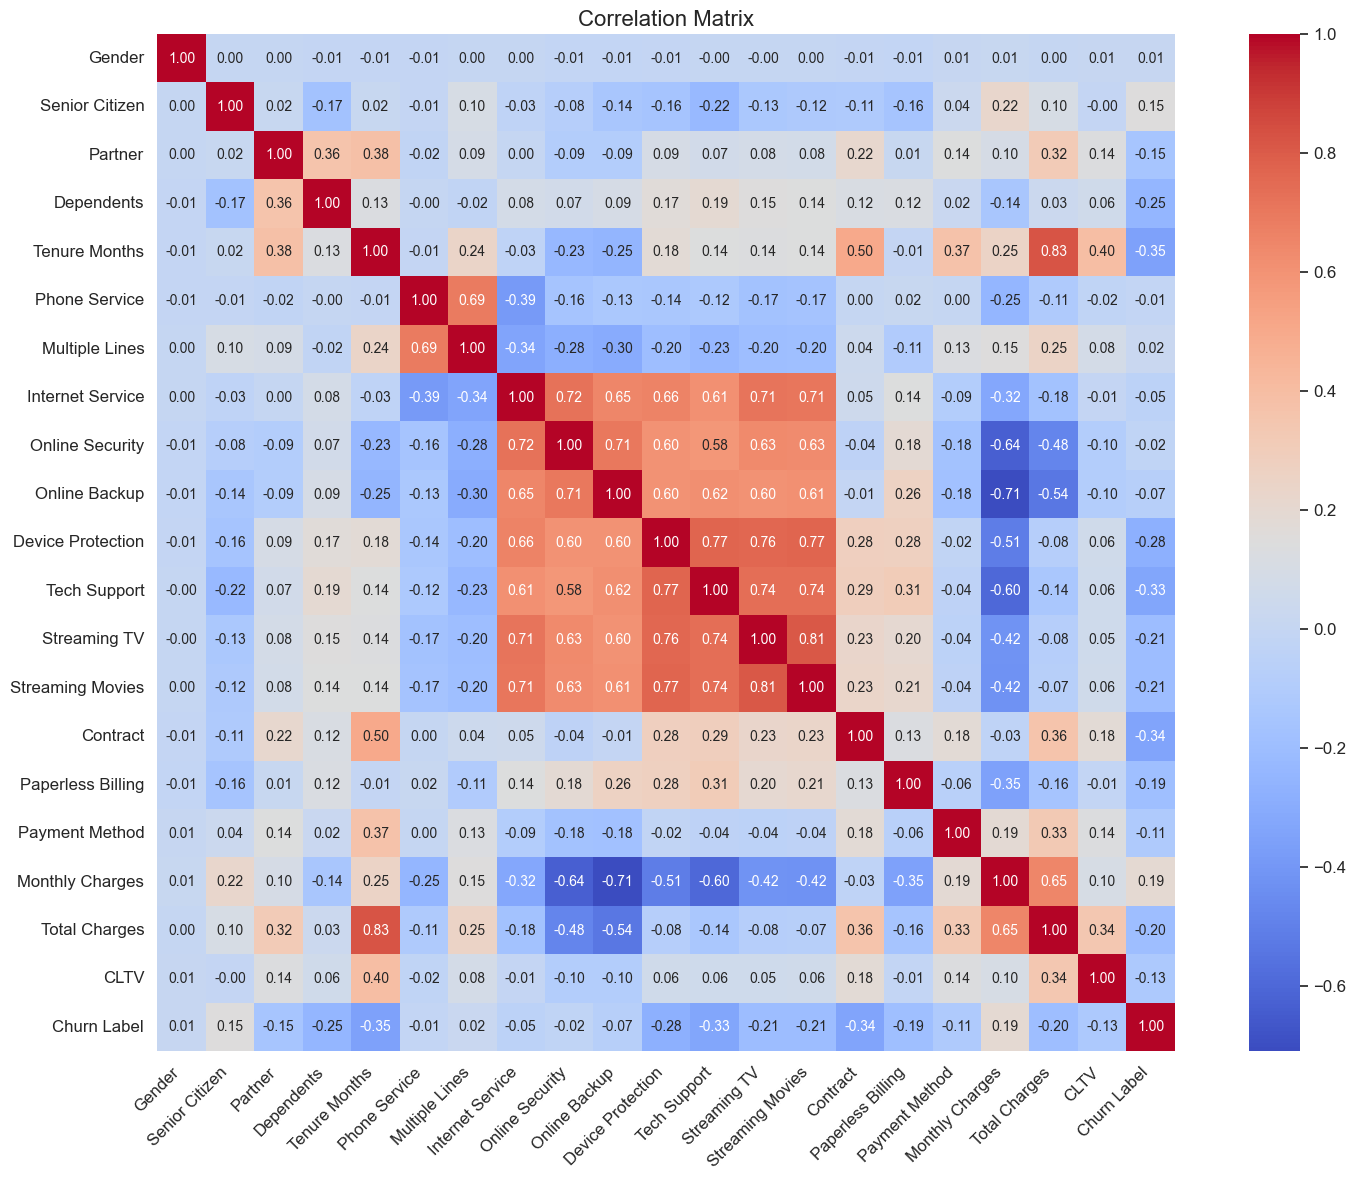

In [446]:
# Optional: filter numeric features if not already done
numeric_data = mldata_log.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix1 = mldata_log[FEATURES + ["Churn Label"]].corr()

# Plot with larger size
plt.figure(figsize=(16, 12))  # Increased from (12, 8)
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            annot_kws={"size": 10})  # Optional: adjust font size for annotations
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Improve label visibility
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

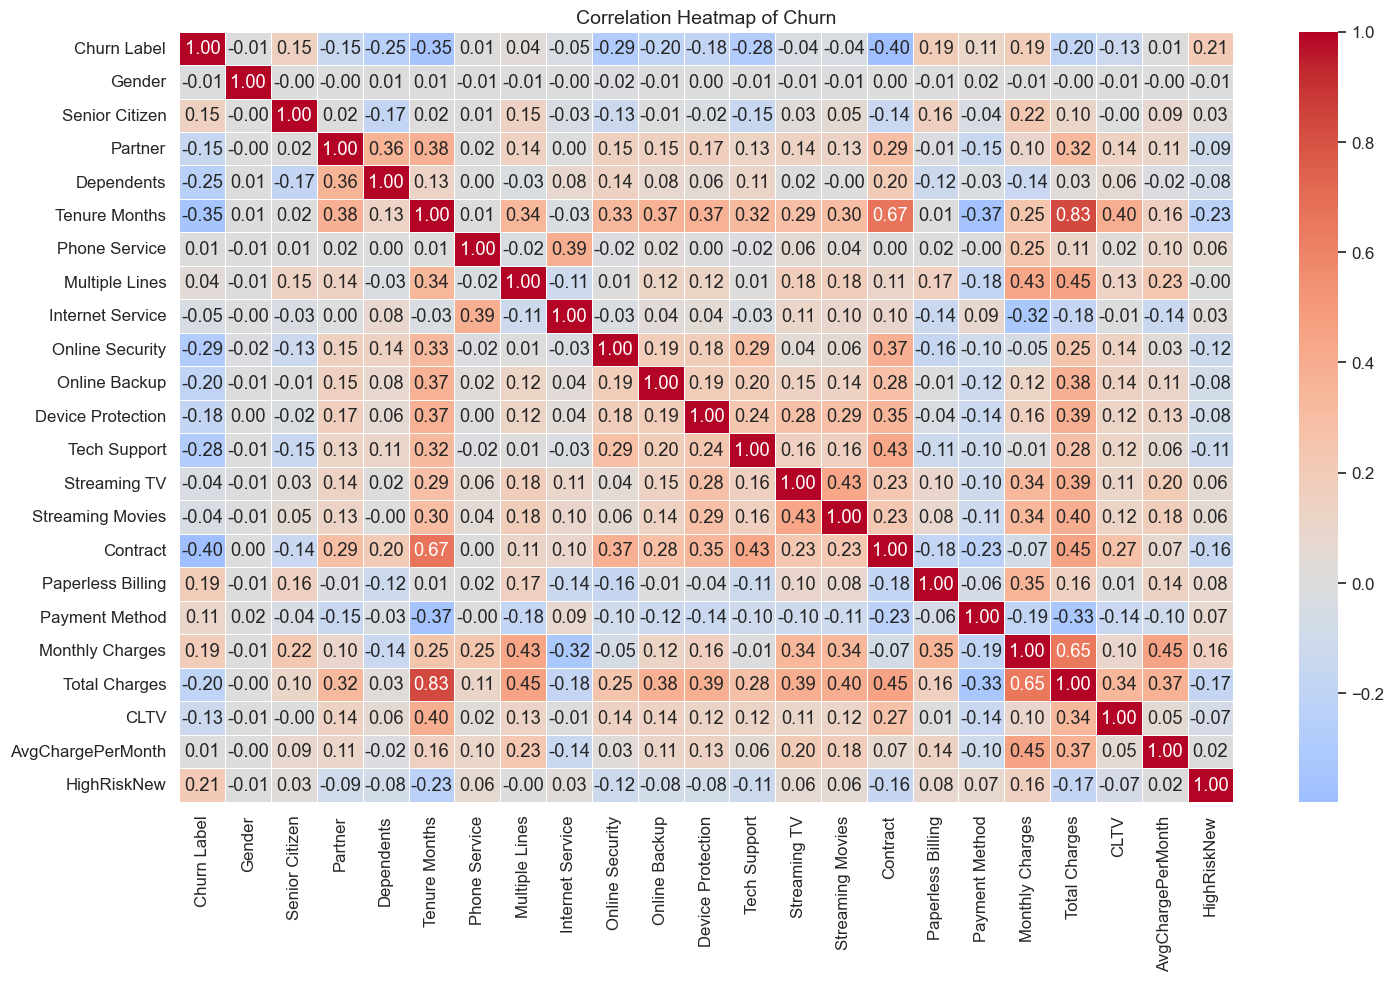

In [447]:
corr_matrix = mldata.corr()

# Move 'Churn Label' to the first position
cols = ['Churn Label'] + [col for col in corr_matrix.columns if col != 'Churn Label']
corr_matrix = corr_matrix[cols].loc[cols]

plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)

plt.title("Correlation Heatmap of Churn", fontsize=14)
plt.show()


In [ ]:
'''
site_icin_log = X_log.copy()
for col in site_icin_log.columns:
    if site_icin_log[col].dtype == 'int8':
        site_icin_log[col] = site_icin_log[col].astype('category')
'''

X_log = mldata_log[ENGINEERED_FEATURES]
y_log = mldata_log["Churn Label"]

joblib.dump(mldata_log[ENGINEERED_FEATURES], "log_expected_features.pkl")

X_log = X_log.apply(lambda col: col.cat.codes if col.dtypes.name == 'category' else col)
print(X_log.dtypes.value_counts())


X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42, stratify=y_log)



int8       136
int32        2
float32      2
Name: count, dtype: int64


In [449]:

# Define features (X) and target variable (y)
X = mldata.drop(['Churn Label'], axis=1)
y = mldata["Churn Label"]

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check churn distribution in train & test sets
train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

print(f"Train Data Distribution:\n{train_dist}\n")


Train Data Distribution:
Churn Label
0    73.464679
1    26.535321
Name: proportion, dtype: float64



In [ ]:
# If train data is imbalanced, upsample the minority class
'''
churned = X_train[y_train == 1]
not_churned = X_train[y_train == 0]

y_churned = y_train[y_train == 1]
y_not_churned = y_train[y_train == 0]

if len(churned) < len(not_churned):
    churned_upsampled, y_churned_upsampled = resample(
        churned, y_churned,
        replace=True,   # Sample with replacement
        n_samples=len(not_churned),  # Match majority class size
        random_state=42
    )

    # Combine upsampled churned with original not churned
    X_train_resample = pd.concat([not_churned, churned_upsampled])
    y_train_resample = pd.concat([y_not_churned, y_churned_upsampled])

    print("\nData was imbalanced. The minority class was upsampled.")

new_train_dist = y_train_resample.value_counts(normalize=True) * 100
print(f"\nNew Train Data Distribution After Upsampling:\n{new_train_dist}")
'''

'\nchurned = X_train[y_train == 1]\nnot_churned = X_train[y_train == 0]\n\ny_churned = y_train[y_train == 1]\ny_not_churned = y_train[y_train == 0]\n\nif len(churned) < len(not_churned):\n    churned_upsampled, y_churned_upsampled = resample(\n        churned, y_churned,\n        replace=True,   # Sample with replacement\n        n_samples=len(not_churned),  # Match majority class size\n        random_state=42\n    )\n\n    # Combine upsampled churned with original not churned\n    X_train_resample = pd.concat([not_churned, churned_upsampled])\n    y_train_resample = pd.concat([y_not_churned, y_churned_upsampled])\n\n    print("\nData was imbalanced. The minority class was upsampled.")\n\nnew_train_dist = y_train_resample.value_counts(normalize=True) * 100\nprint(f"\nNew Train Data Distribution After Upsampling:\n{new_train_dist}")\n'

In [451]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_log,y_train_smote_log=smote.fit_resample(X_train_log, y_train_log)

new_train_dist2 = y_train_smote.value_counts(normalize=True) * 100

print(f"\nNew Train Data Distribution After Upsampling:\n{new_train_dist2}")



New Train Data Distribution After Upsampling:
Churn Label
0    50.0
1    50.0
Name: proportion, dtype: float64


In [452]:
print(X_train_smote_log.dtypes.value_counts())

for col in X_train_smote_log.columns:
    if X_train_smote_log[col].dtype == 'int8':
        X_train_smote_log[col] = X_train_smote_log[col].astype('category')

print(X_train_smote.dtypes.value_counts())
print(X_train_smote_log.dtypes.value_counts())

int8       136
int32        2
float32      2
Name: count, dtype: int64
int32      17
float64     3
int64       2
Name: count, dtype: int64
category    46
category    27
category    17
category    12
category    10
category     9
category     8
category     6
int32        2
float32      2
category     1
Name: count, dtype: int64


In [453]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

In [454]:
mlmodels = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss",enable_categorical=True, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_seed=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, class_weight="balanced")),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
            ('cat', CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_seed=42))
        ],
        voting='soft',
        n_jobs=-1
    )
}

📌 Logistic Regression


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


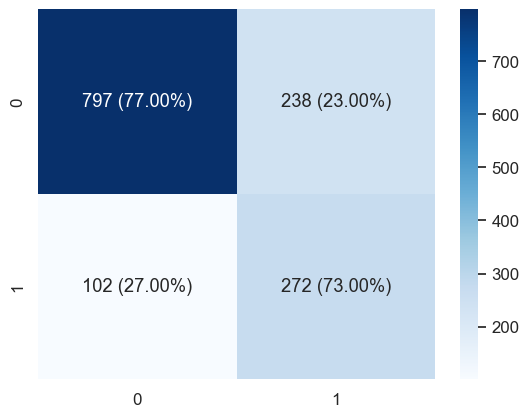

ROC AUC:  74.87%
Model accuracy:  75.87%
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1035
           1       0.53      0.73      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

📌 Random Forest


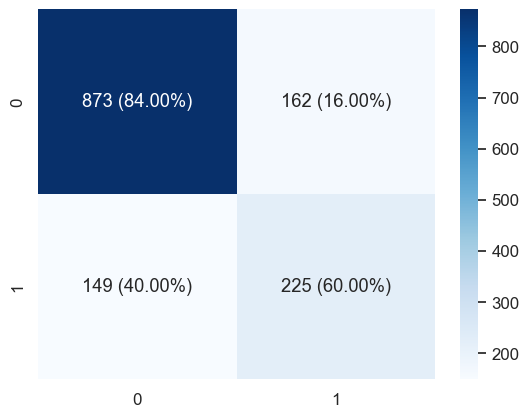

ROC AUC:  72.25%
Model accuracy:  77.93%
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

📌 XGBoost


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [04:22:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


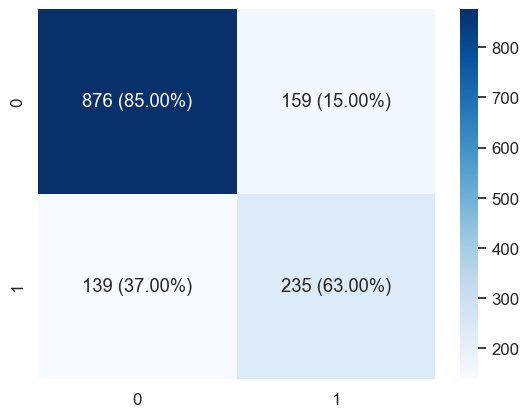

ROC AUC:  73.74%
Model accuracy:  78.85%
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.63      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409

📌 CatBoost


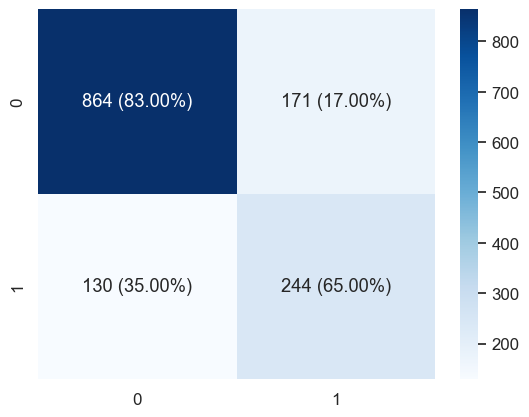

ROC AUC:  74.36%
Model accuracy:  78.64%
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.59      0.65      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

📌 Voting Classifier


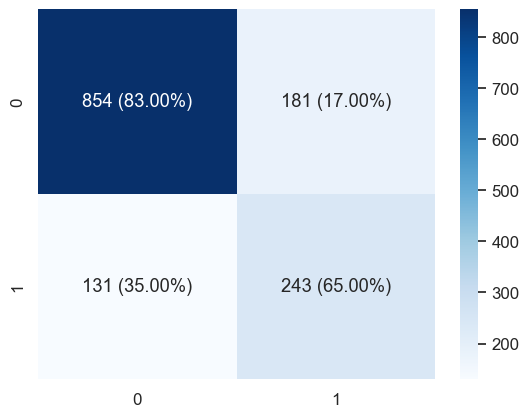

ROC AUC:  73.74%
Model accuracy:  77.86%
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [455]:

for name, mlmodel in mlmodels.items():
    print(f"📌 {name}")

    if name == "Logistic Regression":
        model(mlmodel,X_train_smote_log, y_train_smote_log, X_test_log,y_test_log)
    
    else:
        model(mlmodel,X_train_smote, y_train_smote,X_test,y_test)


In [456]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearch
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                    rf_param_grid,
                    n_iter=20,
                    cv=5,
                    scoring=make_scorer(recall_score),
                    n_jobs=-1,
                    verbose=1
                    )

rf_search.fit(X_train_smote, y_train_smote)

# En iyi sonuçlar
print("En iyi parametreler:", rf_search.best_params_)
print("En iyi F1 skoru:", rf_search.best_score_)

# En iyi modeli kaydet
best_rf = rf_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
En iyi parametreler: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
En iyi F1 skoru: 0.8731793514770224


In [457]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Parametre aralığı
param_dist_logreg = {
    'penalty': ['l2'],  # 'l1' için solver='liblinear' gerekir (küçük veri setleri için)
    'C': [0.01, 0.1, 1, 10, 100],  # Düşük C daha fazla regularization demek
    'class_weight': ['balanced', None],
    'solver': ['lbfgs'],  # lbfgs, l2 ile uyumlu
    'max_iter': [1000, 2000,3000]
}

# Model
logreg = LogisticRegression()

# RandomizedSearchCV
random_search_logreg = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist_logreg,
    n_iter=10,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Eğitimi yap
random_search_logreg.fit(X_train_smote, y_train_smote)

# Sonuçları yazdır
print("📌 En iyi parametreler:", random_search_logreg.best_params_)
print("📊 En iyi F1 skoru:", round(random_search_logreg.best_score_, 4))

# En iyi modeli al
best_logreg = random_search_logreg.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
📌 En iyi parametreler: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 3000, 'class_weight': 'balanced', 'C': 0.1}
📊 En iyi F1 skoru: 0.8161


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [458]:
cat_param_grid = {
    'depth': [6, 8,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200,300],
}

grid_cat = RandomizedSearchCV(
    CatBoostClassifier(verbose=0, random_seed=42),
    param_distributions=cat_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_cat.fit(X_train_smote, y_train_smote)

print("CatBoost 📌 En iyi parametreler:", grid_cat.best_params_)
print("CatBoost 📊 En iyi F1 skoru:", round(grid_cat.best_score_, 4))

best_cat = grid_cat.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CatBoost 📌 En iyi parametreler: {'learning_rate': 0.05, 'iterations': 300, 'depth': 8}
CatBoost 📊 En iyi F1 skoru: 0.8357


In [459]:
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X))
fold_f1, fold_recall, fold_precision, fold_acc = [], [], [], []

feature_importances_log = pd.DataFrame(0, index=X.columns, columns=["importance"])

for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("=" * 30)
    print(f"📂 Fold {i+1}")
    print("=" * 30)

    X_train_fold, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    # SMOTE uygulaması
    smote = SMOTE(random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Logistic Regression modeli
    model_logreg_fold = LogisticRegression(
        max_iter=3000,
        class_weight='balanced',   # İsteğe bağlı
        solver='lbfgs',
        C=0.01                      # Best parametre olabilir (optimizeye göre ayarla)
    )
    model_logreg_fold.fit(X_train_fold_smote, y_train_fold_smote)

    # Tahmin ve skor
    y_val_pred = model_logreg_fold.predict(X_val)
    oof_preds[val_index] = y_val_pred

    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)

    fold_acc.append(acc)
    fold_f1.append(f1)
    fold_recall.append(recall)
    fold_precision.append(precision)

    print(f"✔ Accuracy:  {acc:.4f}")
    print(f"✔ F1 Score:  {f1:.4f}")
    print(f"✔ Recall:    {recall:.4f}")
    print(f"✔ Precision: {precision:.4f}")

    coefs = pd.Series(np.abs(model_logreg_fold.coef_[0]), index=X.columns)
    feature_importances_log["importance"] += coefs

# Ortalama importance
feature_importances_log["importance"] /= FOLDS
feature_importances_log = feature_importances_log.sort_values(by="importance", ascending=False)


# Genel performans
overall_recall = recall_score(y, oof_preds)
print("\n" + "#" * 30)
print(f"📊 Overall OOF Recall (SMOTE + Logistic): {overall_recall:.4f}")
print(f"✅ Accuracy:  {np.mean(fold_acc):.4f} ± {np.std(fold_acc):.4f}")
print(f"✅ F1 Score:  {np.mean(fold_f1):.4f} ± {np.std(fold_f1):.4f}")
print(f"✅ Precision: {np.mean(fold_precision):.4f} ± {np.std(fold_precision):.4f}")
print("#" * 30)

📂 Fold 1


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7518
✔ F1 Score:  0.6269
✔ Recall:    0.7656
✔ Precision: 0.5307
📂 Fold 2


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7745
✔ F1 Score:  0.6708
✔ Recall:    0.7788
✔ Precision: 0.5891
📂 Fold 3


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7716
✔ F1 Score:  0.6477
✔ Recall:    0.7789
✔ Precision: 0.5543
📂 Fold 4


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7997
✔ F1 Score:  0.6713
✔ Recall:    0.7539
✔ Precision: 0.6050
📂 Fold 5


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7727
✔ F1 Score:  0.6226
✔ Recall:    0.7374
✔ Precision: 0.5388
📂 Fold 6


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7415
✔ F1 Score:  0.5767
✔ Recall:    0.6889
✔ Precision: 0.4960
📂 Fold 7


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7841
✔ F1 Score:  0.6275
✔ Recall:    0.7111
✔ Precision: 0.5614
📂 Fold 8


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7727
✔ F1 Score:  0.6639
✔ Recall:    0.7707
✔ Precision: 0.5830
📂 Fold 9


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✔ Accuracy:  0.7898
✔ F1 Score:  0.6318
✔ Recall:    0.7471
✔ Precision: 0.5474
📂 Fold 10
✔ Accuracy:  0.7656
✔ F1 Score:  0.6118
✔ Recall:    0.7471
✔ Precision: 0.5179

##############################
📊 Overall OOF Recall (SMOTE + Logistic): 0.7491
✅ Accuracy:  0.7724 ± 0.0162
✅ F1 Score:  0.6351 ± 0.0280
✅ Precision: 0.5524 ± 0.0319
##############################


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [460]:
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds = np.zeros(len(X))
fold_f1, fold_recall, fold_precision, fold_acc = [], [], [], []
feature_importances_cat = pd.DataFrame(0, index=X.columns, columns=["importance"])

for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("=" * 30)
    print(f"📂 Fold {i+1}")
    print("=" * 30)

    X_train_fold, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # CatBoost
    model_cat = CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=10,
        verbose=0,
        random_seed=42
    )
    model_cat.fit(X_train_fold_smote, y_train_fold_smote)

    # Tahmin ve skorlar
    y_val_pred = model_cat.predict(X_val)
    oof_preds[val_index] = y_val_pred

    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)

    fold_acc.append(acc)
    fold_f1.append(f1)
    fold_recall.append(recall)
    fold_precision.append(precision)

    print(f"✔ Accuracy:  {acc:.4f}")
    print(f"✔ F1 Score:  {f1:.4f}")
    print(f"✔ Recall:    {recall:.4f}")
    print(f"✔ Precision: {precision:.4f}")

    # Feature importance
    feature_importances_cat["importance"] += model_cat.get_feature_importance(prettified=False)

# Ortalama feature importance
feature_importances_cat["importance"] /= FOLDS
feature_importances_cat = feature_importances_cat.sort_values(by="importance", ascending=False)

# Genel sonuçlar
overall_recall = recall_score(y, oof_preds)
print("\n" + "#" * 30)
print(f"📊 Overall OOF Recall (SMOTE + CatBoost): {overall_recall:.4f}")
print(f"✅ Accuracy:  {np.mean(fold_acc):.4f} ± {np.std(fold_acc):.4f}")
print(f"✅ F1 Score:  {np.mean(fold_f1):.4f} ± {np.std(fold_f1):.4f}")
print(f"✅ Precision: {np.mean(fold_precision):.4f} ± {np.std(fold_precision):.4f}")
print("#" * 30)

📂 Fold 1
✔ Accuracy:  0.7801
✔ F1 Score:  0.5995
✔ Recall:    0.6042
✔ Precision: 0.5949
📂 Fold 2
✔ Accuracy:  0.7943
✔ F1 Score:  0.6572
✔ Recall:    0.6683
✔ Precision: 0.6465
📂 Fold 3
✔ Accuracy:  0.7844
✔ F1 Score:  0.6122
✔ Recall:    0.6316
✔ Precision: 0.5941
📂 Fold 4
✔ Accuracy:  0.8026
✔ F1 Score:  0.6233
✔ Recall:    0.6021
✔ Precision: 0.6461
📂 Fold 5
✔ Accuracy:  0.8011
✔ F1 Score:  0.6000
✔ Recall:    0.5866
✔ Precision: 0.6140
📂 Fold 6
✔ Accuracy:  0.7614
✔ F1 Score:  0.5508
✔ Recall:    0.5722
✔ Precision: 0.5309
📂 Fold 7
✔ Accuracy:  0.7940
✔ F1 Score:  0.5961
✔ Recall:    0.5944
✔ Precision: 0.5978
📂 Fold 8
✔ Accuracy:  0.7855
✔ F1 Score:  0.6196
✔ Recall:    0.6000
✔ Precision: 0.6406
📂 Fold 9
✔ Accuracy:  0.8097
✔ F1 Score:  0.6171
✔ Recall:    0.6353
✔ Precision: 0.6000
📂 Fold 10
✔ Accuracy:  0.7940
✔ F1 Score:  0.6006
✔ Recall:    0.6264
✔ Precision: 0.5767

##############################
📊 Overall OOF Recall (SMOTE + CatBoost): 0.6126
✅ Accuracy:  0.7907 ± 0.0130


In [461]:
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)


oof_preds = np.zeros(len(X))
fold_f1, fold_recall, fold_precision, fold_acc = [], [], [], []
feature_importances = pd.DataFrame(0, index=X.columns, columns=["importance"])

for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("=" * 30)
    print(f"📂 Fold {i+1}")
    print("=" * 30)

    X_train_fold, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    # SMOTE uygulaması
    #smote = SMOTE(random_state=42)
    X_train_fold_smote, y_train_fold_smote = smote.fit_resample(X_train_fold, y_train_fold)

    # Random Forest modeli
    model_rf_fold = RandomForestClassifier(
        random_state=42,
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='log2'
    )
    model_rf_fold.fit(X_train_fold_smote, y_train_fold_smote)

    # Tahmin ve skor
    y_val_pred = model_rf_fold.predict(X_val)
    oof_preds[val_index] = y_val_pred

    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)

    fold_acc.append(acc)
    fold_f1.append(f1)
    fold_recall.append(recall)
    fold_precision.append(precision)

    print(f"✔ Accuracy:  {acc:.4f}")
    print(f"✔ F1 Score:  {f1:.4f}")
    print(f"✔ Recall:    {recall:.4f}")
    print(f"✔ Precision: {precision:.4f}")

    # Feature importances topla
    feature_importances["importance"] += model_rf_fold.feature_importances_

# Ortalama feature importance
feature_importances["importance"] /= FOLDS
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

# Genel recall
overall_recall = recall_score(y, oof_preds)
print("\n" + "#" * 30)
print(f"📊 Overall OOF Recall (SMOTE + RF): {overall_recall:.4f}")
print(f"✅ Accuracy:  {np.mean(fold_acc):.4f} ± {np.std(fold_acc):.4f}")
print(f"✅ F1 Score:  {np.mean(fold_f1):.4f} ± {np.std(fold_f1):.4f}")
print(f"✅ Precision: {np.mean(fold_precision):.4f} ± {np.std(fold_precision):.4f}")
print("#" * 30)



📂 Fold 1
✔ Accuracy:  0.7872
✔ F1 Score:  0.6479
✔ Recall:    0.7188
✔ Precision: 0.5897
📂 Fold 2
✔ Accuracy:  0.7957
✔ F1 Score:  0.6786
✔ Recall:    0.7308
✔ Precision: 0.6333
📂 Fold 3
✔ Accuracy:  0.7957
✔ F1 Score:  0.6636
✔ Recall:    0.7474
✔ Precision: 0.5966
📂 Fold 4
✔ Accuracy:  0.7955
✔ F1 Score:  0.6382
✔ Recall:    0.6649
✔ Precision: 0.6135
📂 Fold 5
✔ Accuracy:  0.7983
✔ F1 Score:  0.6414
✔ Recall:    0.7095
✔ Precision: 0.5853
📂 Fold 6
✔ Accuracy:  0.7543
✔ F1 Score:  0.5728
✔ Recall:    0.6444
✔ Precision: 0.5156
📂 Fold 7
✔ Accuracy:  0.7912
✔ F1 Score:  0.6240
✔ Recall:    0.6778
✔ Precision: 0.5782
📂 Fold 8
✔ Accuracy:  0.7699
✔ F1 Score:  0.6318
✔ Recall:    0.6780
✔ Precision: 0.5915
📂 Fold 9
✔ Accuracy:  0.8026
✔ F1 Score:  0.6371
✔ Recall:    0.7176
✔ Precision: 0.5728
📂 Fold 10
✔ Accuracy:  0.7912
✔ F1 Score:  0.6202
✔ Recall:    0.6897
✔ Precision: 0.5634

##############################
📊 Overall OOF Recall (SMOTE + RF): 0.6982
✅ Accuracy:  0.7882 ± 0.0141
✅ F1 S

In [462]:
feature_importances.head(10)



,importance
Contract,0.189000
Online Security,0.120196
Tech Support,0.105682
Dependents,0.083058
Tenure Months,0.079834
Monthly Charges,0.064148
Total Charges,0.058985
AvgChargePerMonth,0.052385
Online Backup,0.046160
Internet Service,0.038135


In [463]:
feature_importances_log.head(10)

,importance
Dependents,1.040499
Contract,0.789733
Phone Service,0.652093
Online Security,0.430527
Gender,0.423060
Tech Support,0.383385
Senior Citizen,0.281428
Partner,0.274711
Online Backup,0.245639
Device Protection,0.179904


In [464]:
feature_importances_cat.head(10)

,importance
CLTV,8.523541
Monthly Charges,7.064125
Multiple Lines,6.379805
Online Security,6.305131
Online Backup,6.290261
Tenure Months,6.064663
Tech Support,5.977529
Contract,5.820461
Payment Method,5.157664
Device Protection,5.139293


C:\Users\emrea\AppData\Local\Temp\ipykernel_2812\935380642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_features, palette="viridis")


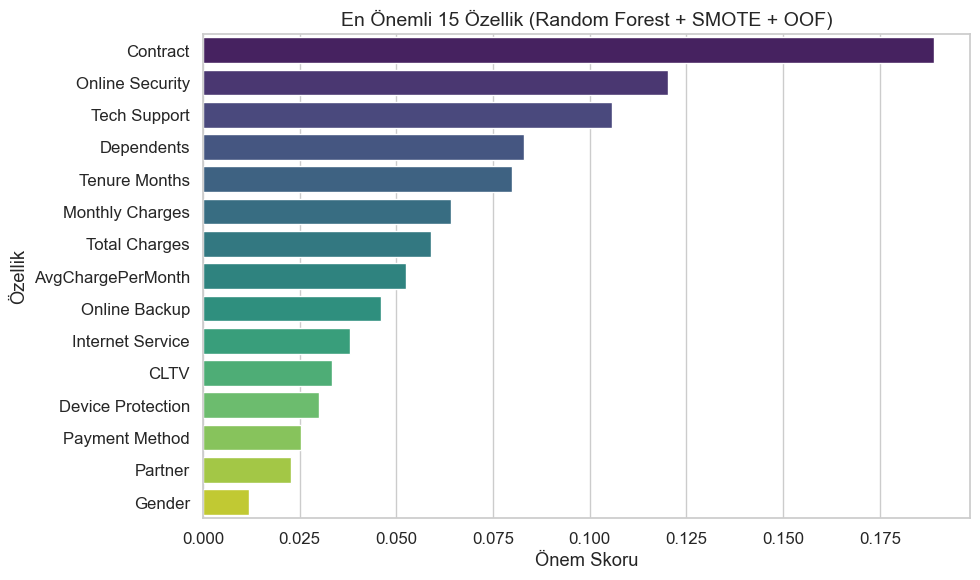

In [465]:
top_features = feature_importances.sort_values(by="importance", ascending=False).head(15).reset_index()
top_features.columns = ["Feature", "Importance"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features, palette="viridis")
plt.title("En Önemli 15 Özellik (Random Forest + SMOTE + OOF)", fontsize=14)
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


In [466]:
# SMOTE uygulanmış tam veriyle yeniden eğitim
smote = SMOTE(random_state=42)
X_final, y_final = smote.fit_resample(X, y)

# Final modelin tanımı — burada en iyi parametreleri kullanıyoruz
final_rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2'
)

# Modelin eğitilmesi
final_rf_model.fit(X_final, y_final)

# Eğitilmiş modeli kaydet (production için)
joblib.dump(final_rf_model, "final_random_forest_model.pkl")


['final_random_forest_model.pkl']

In [ ]:
smote = SMOTE(random_state=42)
X_log_final, y_log_final = smote.fit_resample(X_log, y_log)

for col in X_log_final.columns:
    if X_log_final[col].dtype == 'int8':
        X_log_final[col] = X_log_final[col].astype('category')

final_log_model = LogisticRegression(
        max_iter=3000,
        class_weight='balanced',   
        solver='lbfgs',
        C=0.01                      
    )

final_log_model.fit(X_log_final, y_log_final)

# Eğitilmiş modeli kaydet (production için)
joblib.dump(final_log_model, "final_log_model.pkl")


c:\Users\emrea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['final_log_model.pkl']